<a href="https://colab.research.google.com/github/gvigkannan/tensorflow_certification_prep/blob/chp10/hands_on_chp10_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, losses
import numpy as np
import pandas as pd

In [ ]:
import torch

In [ ]:
print(tf.__version__)
print(keras.__version__)

2.4.0
2.4.0


In [ ]:
#Fashion MNIST!
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [ ]:
X_valid, X_train = X_train_full[:5000]/255.0 ,X_train_full[5000:]/255.0 
y_valid, y_train = y_train_full[:5000], y_train_full[:5000]

In [ ]:
#Creating a Sequential Dense Model!
model_seq = Sequential()
model_seq.add(layers.Flatten(input_shape = [28,28], name = 'Flatten1'))
model_seq.add(layers.Dense(300, activation= 'relu', name = 'Hidden1'))
model_seq.add(layers.Dense(100, activation = 'relu', name = 'Hidden2'))
model_seq.add(layers.Dense(10, activation = 'softmax', name = 'Output_Layer'))

In [ ]:
model_seq.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Flatten1 (Flatten)           (None, 784)               0         
_________________________________________________________________
Hidden1 (Dense)              (None, 300)               235500    
_________________________________________________________________
Hidden2 (Dense)              (None, 100)               30100     
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
inputs = keras.Input(shape = (784, ))
img_inputs = keras.Input(shape = (28, 28), name = 'Input_Layer')
# Not sure why I am not able to implement Flatten!
#x = layers.Flatten()(img_inputs)
dense_1 = layers.Dense(300,activation = 'relu', name = 'Hidden1')(inputs)
dense_2 = layers.Dense(100, activation = 'relu' , name = 'Hidden2')(dense_1)
outputs = layers.Dense(10, activation = 'softmax', name = 'Output_Layer')(dense_2)
model_fn = keras.Model(inputs = inputs, outputs = outputs, name = 'fmnist_fn')



```
# Or if you wish to have different layers for activation

hidden_1 = layer.Dense(10)(inputs)
act_1 = layers.ReLU()(hidden_1)
```



In [ ]:
model_fn.summary()

Model: "fmnist_fn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
Hidden1 (Dense)              (None, 300)               235500    
_________________________________________________________________
Hidden2 (Dense)              (None, 100)               30100     
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


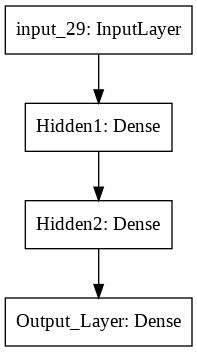

In [ ]:
keras.utils.plot_model(model_fn)

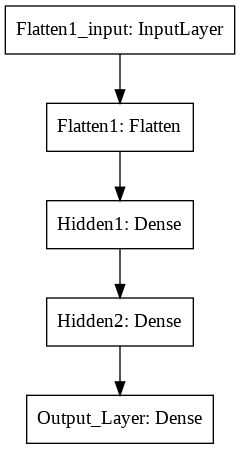

In [ ]:
keras.utils.plot_model(model_seq)

In [ ]:
#Number of connections = Input Dimension x Units + Units

In [ ]:
display(model_fn.layers)

In [ ]:
display(model_seq.layers)

In [ ]:
print(model_fn.get_layer('Hidden1').name)
print(model_fn.get_layer('Hidden1').units)
print(model_fn.get_layer('Hidden1').activation)
# weights, biases = model_fn.get_weights() # How do you self a particular layer?

Hidden1
300
<function relu at 0x7fc40b7b1e18>


ValueError: ignored

In [ ]:
model_fn.get_layer('Hidden1').get_weights()
model_fn.get_layer('Hidden1').weights #Both are the same!

[<tf.Variable 'Hidden1/kernel:0' shape=(784, 300) dtype=float32, numpy=
 array([[ 0.02957828,  0.00221826,  0.05748157, ..., -0.03764187,
          0.00221249, -0.04335946],
        [-0.07199204, -0.02138671, -0.06050288, ...,  0.04953157,
          0.02466745, -0.04375446],
        [-0.02918333,  0.00899031, -0.03273861, ..., -0.03865675,
          0.00453048, -0.00533152],
        ...,
        [ 0.03016911, -0.0633958 ,  0.00157738, ..., -0.05473098,
         -0.04790075, -0.00522023],
        [-0.04010401, -0.0262572 , -0.03587914, ..., -0.07065129,
          0.03455112,  0.0029561 ],
        [-0.00666641, -0.03930964,  0.06301267, ..., -0.05135559,
         -0.05324265, -0.04194933]], dtype=float32)>,
 <tf.Variable 'Hidden1/bias:0' shape=(300,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [ ]:
# It is recommended you provide the input shape before hand
# But you can make models without inputs as well